# CS5228 Rental Prediction

In [5]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import f1_score, mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from matplotlib.colors import ListedColormap
# load data
train_data = pd.read_csv('./data/processed/train.csv')
test_data = pd.read_csv('./data/processed/test.csv')

X_train, y_train = train_data.drop(columns='monthly_rent'), train_data['monthly_rent'].copy()
X_test = test_data

# Standardize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [2]:
def plot_validation_results(param_to_scores):

    plt.figure()

    param_to_validation_scores = {k: scores[1] for (k, scores) in param_to_scores.items()}
    
    # Plot the scores for each fold
    for param, scores in param_to_validation_scores.items():
        plt.scatter([param] * len(scores), scores)

    # Calculate mean and standard variation across all folds for each parameter value
    score_mean = np.array([np.mean(v) for k,v in sorted(param_to_validation_scores.items())])
    score_std = np.array([np.std(v) for k,v in sorted(param_to_validation_scores.items())])
    
    # Plot error bar
    plt.errorbar(sorted(param_to_validation_scores.keys()), score_mean, yerr=score_std)
    
    plt.xlabel('param')
    plt.ylabel('Cross-Validation RSME Score')
    plt.show()

    

def plot_scores(param_to_scores):

    plt.figure()

    param_to_training_scores = {k: scores[0] for (k, scores) in param_to_scores.items()}
    param_to_validation_scores = {k: scores[1] for (k, scores) in param_to_scores.items()}
    
    # Calculate mean and standard variation across all folds for each parameter value
    training_score_mean = np.array([np.mean(v) for k,v in sorted(param_to_training_scores.items())])
    validation_score_mean = np.array([np.mean(v) for k,v in sorted(param_to_validation_scores.items())])
    
    # Plot error bar
    plt.plot(sorted(param_to_training_scores.keys()), training_score_mean, label ='Training Score')
    plt.plot(sorted(param_to_validation_scores.keys()), validation_score_mean, label ='Validation Score')
    plt.legend(loc='lower right') 
    
    plt.xlabel('param')
    plt.ylabel('Cross-Validation RSME Score')
    plt.show()         


In [3]:

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Elastic Net': ElasticNet(),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42, verbose=1),
    'Random Forest': RandomForestRegressor(random_state=42, verbose=1, n_jobs=-1),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42, verbose=1, n_estimators=300, max_depth=4, learning_rate=0.15, subsample=0.8, max_features=0.8),
    # 'SVM': SVR(),
}
# train models and save results

"""
for name, model in models.items():
    print(f'Training {name}...')
    
    # Train model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f'{name} training completed.')

    # Create a dataframe with two columns: Id & Predicted
    result_df = pd.DataFrame({
        'Id': range(len(y_pred)),
        'Predicted': y_pred
    })
    save_path = './data/predictions/' + name + '.csv'
    result_df.to_csv(save_path, index=False)
    print(f'{name} training result saved.\n')


"""


"\nfor name, model in models.items():\n    print(f'Training {name}...')\n    \n    # Train model\n    model.fit(X_train, y_train)\n    y_pred = model.predict(X_test)\n    print(f'{name} training completed.')\n\n    # Create a dataframe with two columns: Id & Predicted\n    result_df = pd.DataFrame({\n        'Id': range(len(y_pred)),\n        'Predicted': y_pred\n    })\n    save_path = './data/predictions/' + name + '.csv'\n    result_df.to_csv(save_path, index=False)\n    print(f'{name} training result saved.\n')\n\n\n"

Training Linear Regression...
Linear Regression training completed.
Linear Regression training result saved.

Linear Regression evaluation:

284564.2116964444 414.3138339194966


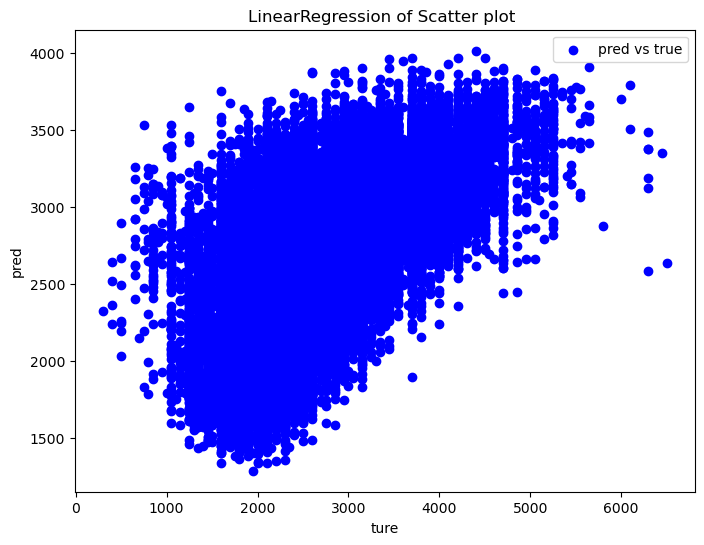

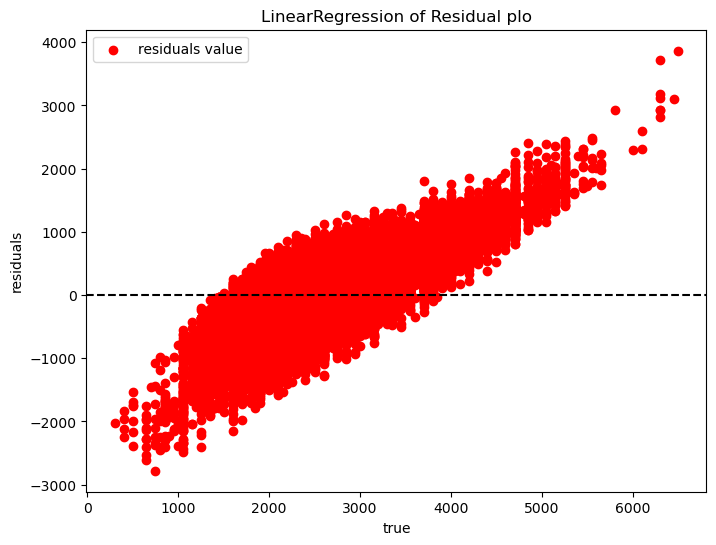

In [7]:
# train different model and evaluation
# For LinearRegression
name_LinearRegression = 'Linear Regression'
model_LinearRegression = LinearRegression()
print(f'Training {name_LinearRegression}...')
model_LinearRegression.fit(X_train, y_train)
y_pred = model_LinearRegression.predict(X_test)

y_train_pred = model_LinearRegression.predict(X_train)

print(f'{name_LinearRegression} training completed.')
result_df = pd.DataFrame({
        'Id': range(len(y_pred)),
        'Predicted': y_pred
    })
save_path = './data/predictions/' + name_LinearRegression + '.csv'
result_df.to_csv(save_path, index=False)
print(f'{name_LinearRegression} training result saved.\n')

print('{} evaluation:\n'.format(name_LinearRegression))

mse_LinearRegression = mean_squared_error(y_train, y_train_pred)

mae_LinearRegression = mean_absolute_error(y_train, y_train_pred)
print(mse_LinearRegression,mae_LinearRegression)

# Both mse and mae are too big

#Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_train_pred, color='blue', label='pred vs true')
plt.xlabel('ture')
plt.ylabel('pred')
plt.legend()
plt.title('LinearRegression of Scatter plot ')
plt.show()

# Residual plot
residuals = y_train - y_train_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_train, residuals, color='red', label='residuals value')
plt.xlabel('true')
plt.ylabel('residuals')
plt.axhline(y=0, color='black', linestyle='--')
plt.legend()
plt.title('LinearRegression of Residual plo')
plt.show()

Training Elastic Net...
Elastic Net training completed.
Elastic Net training result saved.

Elastic Net evaluation:

258303.70333474898 393.6620105621556


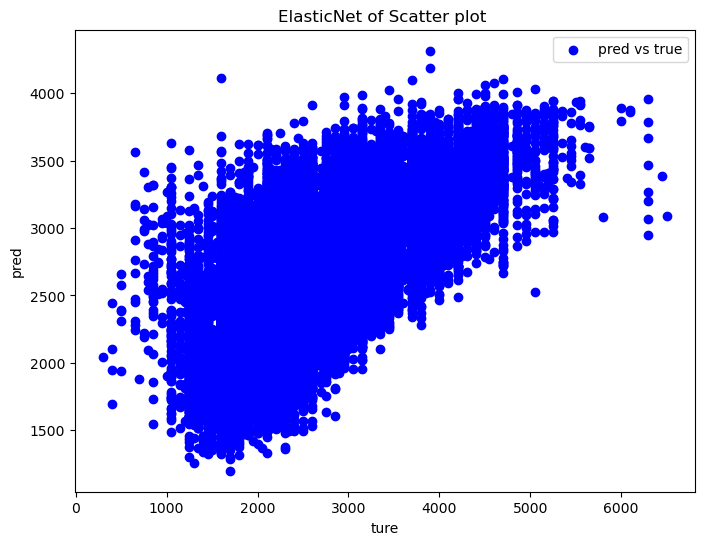

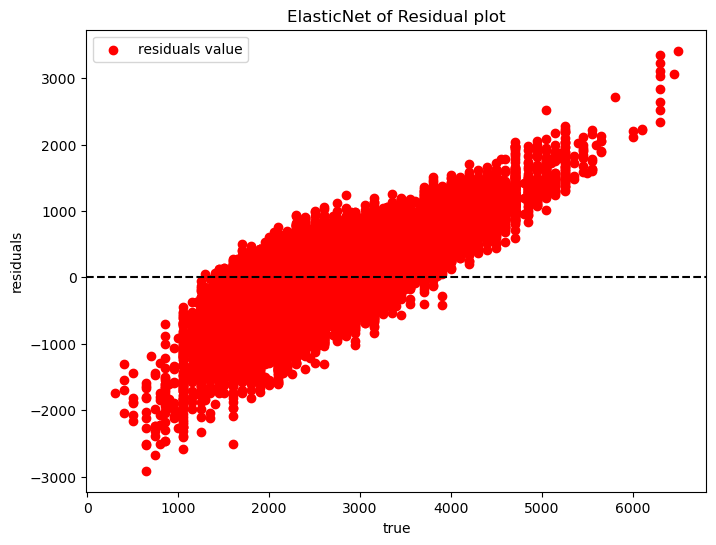

In [6]:
name_ElasticNet = 'Elastic Net'
model_ElasticNet = ElasticNet(alpha= 0.1, l1_ratio=0.5, random_state=42)
print(f'Training {name_ElasticNet}...')

model_ElasticNet.fit(X_train, y_train)
y_pred = model_ElasticNet.predict(X_test)

y_train_pred = model_ElasticNet.predict(X_train)

print(f'{name_ElasticNet} training completed.')
result_df = pd.DataFrame({
        'Id': range(len(y_pred)),
        'Predicted': y_pred
    })
save_path = './data/predictions/' + name_ElasticNet + '.csv'
result_df.to_csv(save_path, index=False)
print(f'{name_ElasticNet} training result saved.\n')

print('{} evaluation:\n'.format(name_ElasticNet))

mse_ElasticNet = mean_squared_error(y_train, y_train_pred)
mae_ElasticNet = mean_absolute_error(y_train, y_train_pred)
print(mse_ElasticNet,mae_ElasticNet)

# not good

#Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_train_pred, color='blue', label='pred vs true')
plt.xlabel('ture')
plt.ylabel('pred')
plt.legend()
plt.title('ElasticNet of Scatter plot ')
plt.show()

# Residual plot
residuals = y_train - y_train_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_train, residuals, color='red', label='residuals value')
plt.xlabel('true')
plt.ylabel('residuals')
plt.axhline(y=0, color='black', linestyle='--')
plt.legend()
plt.title('ElasticNet of Residual plot')
plt.show()

In [6]:
name_GradientBoosting = 'Gradient Boosting'
params = {
    "n_estimators": 500,
    "max_depth": 5,
    "min_samples_split": 5,
    "max_features": "sqrt",
    "learning_rate": 0.05,
    "random_state" : 42,
    "verbose" : 1,
}

model_GradientBoosting = GradientBoostingRegressor(** params)
print(f'Training {name_GradientBoosting}...')

model_GradientBoosting.fit(X_train, y_train)
y_pred = model_GradientBoosting.predict(X_test)

y_train_pred = model_GradientBoosting.predict(X_train)

print(f'{name_GradientBoosting} training completed.')
result_df = pd.DataFrame({
        'Id': range(len(y_pred)),
        'Predicted': y_pred
    })
save_path = './data/predictions/' + name_GradientBoosting + '.csv'
result_df.to_csv(save_path, index=False)
print(f'{name_GradientBoosting} training result saved.\n')

print('{} evaluation:\n'.format(name_GradientBoosting))

mse_GradientBoosting = mean_squared_error(y_train, y_train_pred)
mae_GradientBoosting = mean_absolute_error(y_train, y_train_pred)
print(mse_GradientBoosting,mae_GradientBoosting)

Training Gradient Boosting...
      Iter       Train Loss   Remaining Time 
         1      466684.9487           20.95s
         2      451977.7328           19.07s
         3      437358.7202           18.42s
         4      428413.3079           18.14s
         5      413675.6900           18.19s
         6      407010.3847           18.14s
         7      394014.4808           18.35s
         8      381780.8288           18.42s
         9      370414.0390           18.19s
        10      362054.3423           17.97s
        20      297740.1786           19.34s
        30      266669.9094           19.10s
        40      250678.1319           18.76s
        50      241142.6438           18.26s
        60      235488.2376           17.84s
        70      231723.6257           17.27s
        80      229256.5133           16.66s
        90      227462.7579           16.11s
       100      225908.5632           15.69s
       200      218726.9226           11.19s
       300      214767.0

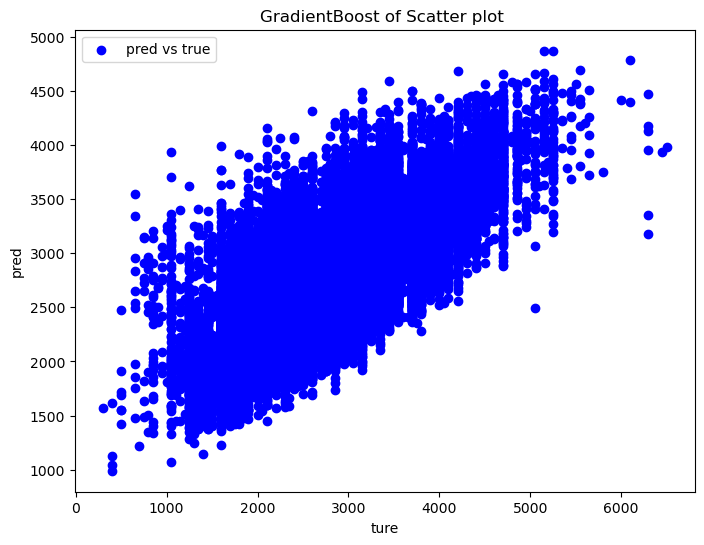

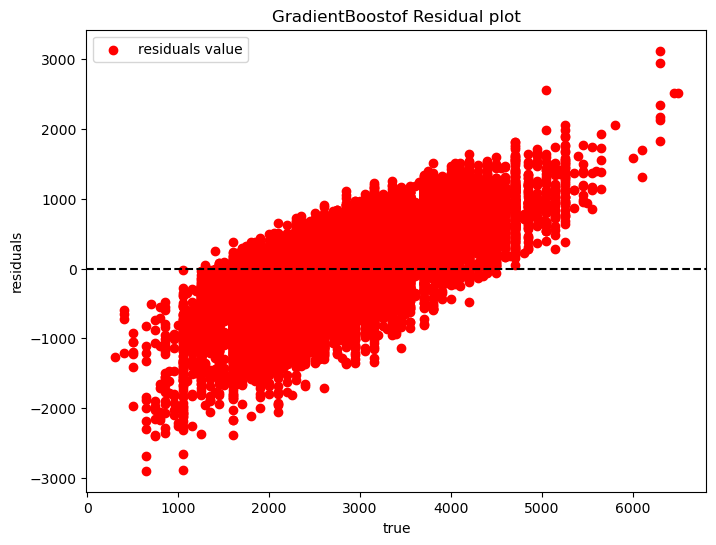

In [7]:
#Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_train_pred, color='blue', label='pred vs true')
plt.xlabel('ture')
plt.ylabel('pred')
plt.legend()
plt.title('GradientBoost of Scatter plot ')
plt.show()

# Residual plot
residuals = y_train - y_train_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_train, residuals, color='red', label='residuals value')
plt.xlabel('true')
plt.ylabel('residuals')
plt.axhline(y=0, color='black', linestyle='--')
plt.legend()
plt.title('GradientBoostof Residual plot')
plt.show()

In [9]:

# Only considered hyperparameter: max depth of trees
param_choices = [1,2,3,4,5,6,7]
param_to_scores = {}
params1 = {
    "n_estimators": 500,
    "min_samples_split": 5,
    "learning_rate": 0.03,
    "random_state" : 42,
    "verbose" : 1,
}

for param in param_choices:
    regressor = GradientBoostingRegressor(** params1,max_depth=param)
    scores = cross_validate(regressor, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error', return_train_score= True)
    rsme_train = scores['train_score'] * (-1)
    rsme_valid = scores['test_score'] * (-1)
    param_to_scores[param] = (rsme_train, rsme_valid)
    print('param = {}, RSME training = {:.1f} ({:.1f}), RSME validation = {:.1f} ({:.1f})'
          .format(param, np.mean(rsme_train), np.std(rsme_train), np.mean(rsme_valid), np.std(rsme_valid)))

      Iter       Train Loss   Remaining Time 
         1      480435.4205           16.32s
         2      473452.9762           16.02s
         3      466862.3350           15.70s
         4      460658.6986           15.91s
         5      454802.6935           15.79s
         6      449291.0113           15.70s
         7      444087.7424           15.63s
         8      439190.8458           15.72s
         9      434548.7864           15.75s
        10      430149.6362           15.72s
        20      396744.2875           15.33s
        30      373056.0646           15.27s
        40      355130.2789           15.04s
        50      341401.0361           14.71s
        60      330857.8074           14.29s
        70      322649.4250           14.00s
        80      315914.5368           13.61s
        90      310130.5624           13.29s
       100      305129.1181           12.99s
       200      275744.2986            9.55s
       300      261923.8451            6.33s
       40

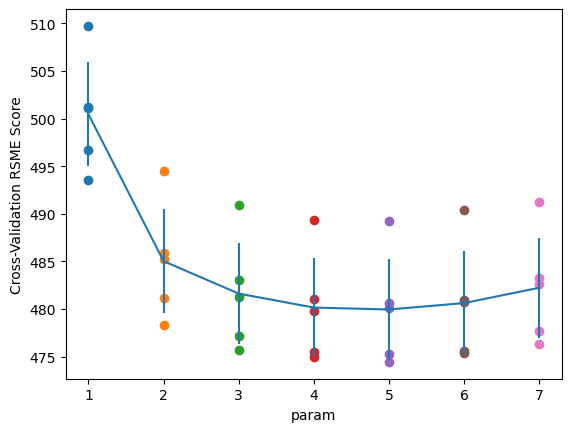

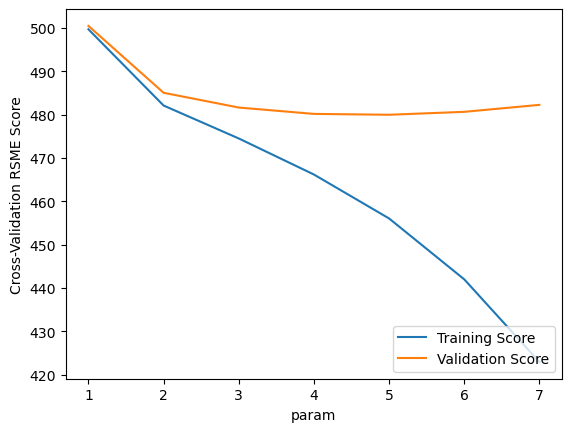

In [10]:
plot_validation_results(param_to_scores)

plot_scores(param_to_scores)
### ！！！！！ 图2显示2最好，但是结果带进去很差

Training Random Forest...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    6.4s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 300 out of 300 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 300 out of 300 | elapsed:    0.1s finished


Random Forest training completed.
Random Forest training result saved.

Random Forest evaluation:

256189.82968927277 387.6135720557776


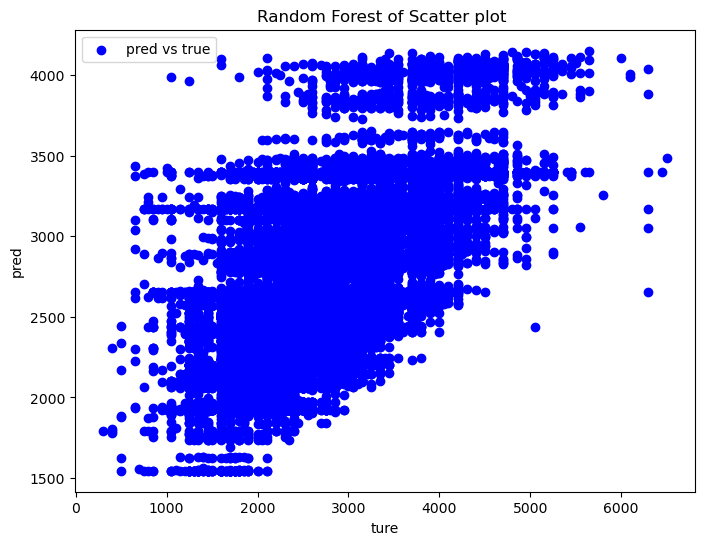

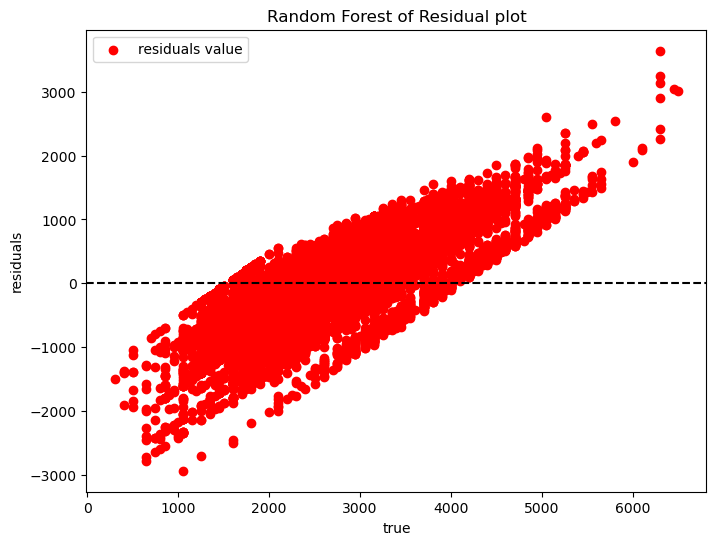

In [17]:

name_RandomForest = 'Random Forest'
model_RandomForest = RandomForestRegressor(random_state=42, verbose=1, n_jobs=-1, n_estimators = 300, max_depth = 5)
print(f'Training {name_RandomForest}...')

model_RandomForest.fit(X_train, y_train)
y_pred = model_RandomForest.predict(X_test)

y_train_pred = model_RandomForest.predict(X_train)

print(f'{name_RandomForest} training completed.')
result_df = pd.DataFrame({
        'Id': range(len(y_pred)),
        'Predicted': y_pred
    })
save_path = './data/predictions/' + name_RandomForest + '.csv'
result_df.to_csv(save_path, index=False)
print(f'{name_RandomForest} training result saved.\n')

print('{} evaluation:\n'.format(name_RandomForest))

mse_RandomForest = mean_squared_error(y_train, y_train_pred)
mae_RandomForest = mean_absolute_error(y_train, y_train_pred)
print(mse_RandomForest,mae_RandomForest)

# not good

#Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_train_pred, color='blue', label='pred vs true')
plt.xlabel('ture')
plt.ylabel('pred')
plt.legend()
plt.title('Random Forest of Scatter plot ')
plt.show()

# Residual plot
residuals = y_train - y_train_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_train, residuals, color='red', label='residuals value')
plt.xlabel('true')
plt.ylabel('residuals')
plt.axhline(y=0, color='black', linestyle='--')
plt.legend()
plt.title('Random Forest of Residual plot')
plt.show()



Training AdaBoost...
AdaBoost training completed.
AdaBoost training result saved.

AdaBoost evaluation:

274332.3993140895 413.2182299141048


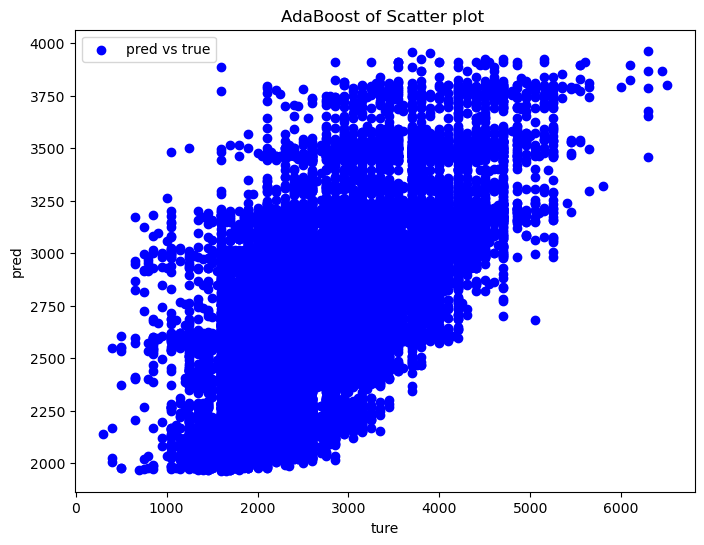

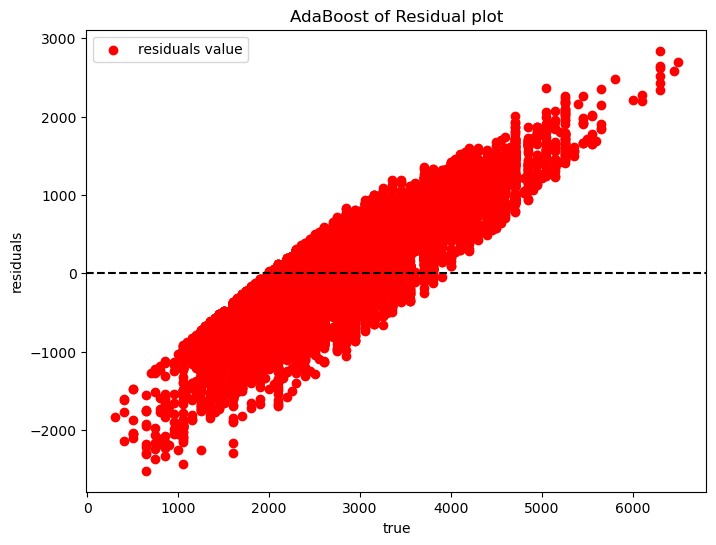

In [15]:
name_AdaBoost = 'AdaBoost'
base_regressor = DecisionTreeRegressor(max_depth=4)
params = {
    "n_estimators": 500,
    "learning_rate": 0.05,
    "random_state" : 42,
}
model_AdaBoost = AdaBoostRegressor(** params)
print(f'Training {name_AdaBoost}...')

model_AdaBoost.fit(X_train, y_train)
y_pred = model_AdaBoost.predict(X_test)

y_train_pred = model_AdaBoost.predict(X_train)

print(f'{name_AdaBoost} training completed.')
result_df = pd.DataFrame({
        'Id': range(len(y_pred)),
        'Predicted': y_pred
    })
save_path = './data/predictions/' + name_AdaBoost + '.csv'
result_df.to_csv(save_path, index=False)
print(f'{name_AdaBoost} training result saved.\n')

print('{} evaluation:\n'.format(name_AdaBoost))

mse_AdaBoost = mean_squared_error(y_train, y_train_pred)
mae_AdaBoost = mean_absolute_error(y_train, y_train_pred)
print(mse_AdaBoost,mae_AdaBoost)

# not good

#Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_train_pred, color='blue', label='pred vs true')
plt.xlabel('ture')
plt.ylabel('pred')
plt.legend()
plt.title('AdaBoost of Scatter plot ')
plt.show()

# Residual plot
residuals = y_train - y_train_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_train, residuals, color='red', label='residuals value')
plt.xlabel('true')
plt.ylabel('residuals')
plt.axhline(y=0, color='black', linestyle='--')
plt.legend()
plt.title('AdaBoost of Residual plot')
plt.show()
